<a href="https://colab.research.google.com/github/nishah8/dataandpython/blob/main/Copy_of_Data_Exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring data sets
---

This [link](https://docs.google.com/document/d/1cijDOCDixsYu-Rr9pC8STPPXado3xoFpgBAZgdDTLHs/edit?usp=sharing) will take you to a list of some of the datasets we use during the Programming for Data course.

For this exercise, please choose a dataset to work with.

Use the code cell below to play with the data.  Look at what data is included, where there is any null data, if there are any columns that need renaming, removing, new values calculated from them.

Form some ideas of what you might want to know from the data and use the techniques you have learned so far to show the answers to these.  You might do this by getting summary statistics, by sorting and showing parts of the dataset, by calculating new values, etc.

### What to do
---

Decide what you want to know, explain this in the TEXT cell below, then write some code to get the answer.  When you have done this, add a new text cell below the code cell, explain what you have found.  Then do the same again, adding text cell, code cell, text cell, for something else you would like to know.

I've used the paisley weather data as my chosen data set. I'm going to attempt to clean the data and then have some visualisation using the cleaned data.

I have created 3 plots giving historical information about tempratures, annual rainfall and statistics (via a boxplot) about min sun(hours)/month you got every year.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   yyyy         746 non-null    int64 
 1   mm           746 non-null    int64 
 2   tmax (degC)  746 non-null    object
 3   tmin (degC)  746 non-null    object
 4   af (days)    746 non-null    object
 5   rain (mm)    745 non-null    object
 6   sun (hours)  746 non-null    object
 7   status       14 non-null     object
dtypes: int64(2), object(6)
memory usage: 46.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         745 non-null    int64  
 1   Month        745 non-null    int64  
 2   tmax (degC)  745 non-null    float64
 3   tmin (degC)  745 non-null    float64
 4   af (days)    745 non-null    float64
 5   rain (mm)    745 non-null

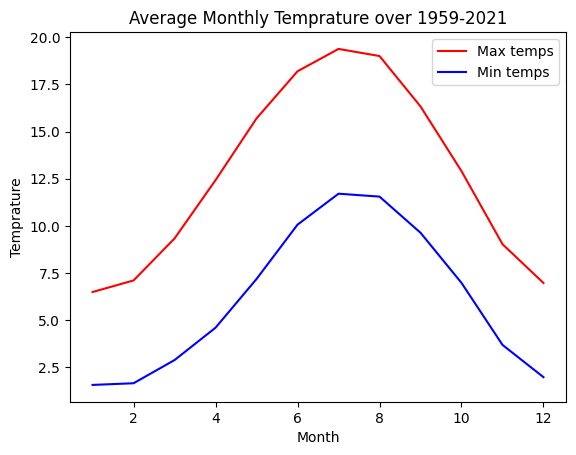

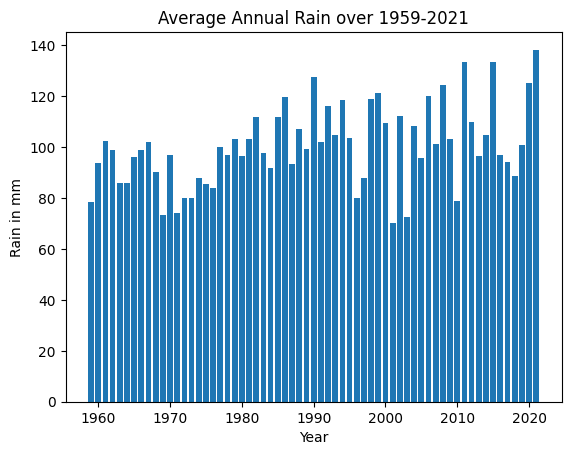

Year
1959    13.5
1960    29.1
1961    19.1
1962    27.0
1963    25.8
        ... 
2017    34.4
2018    31.8
2019    29.6
2020    20.4
2021    51.0
Name: sun (hours), Length: 63, dtype: float64


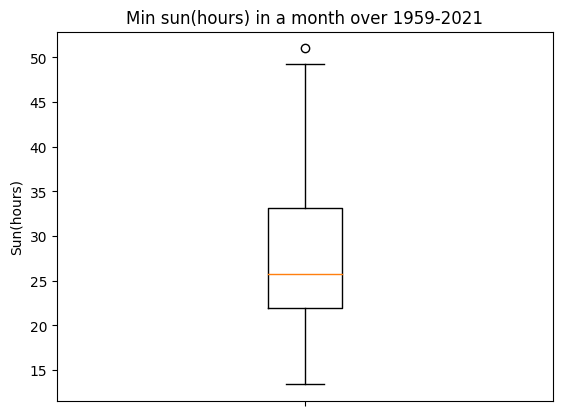

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Paisley-Weather-Data.csv "
df = pd.read_csv(url)

print(df.info())
print()
#print(df)

def clean_and_convert(value): #this is to clean certain columns which have mixed data type but should be only numerical
  if isinstance(value, str):
    value = value.replace('*', '')
    return float(value)
  else:
    return value

def cleaningdata(data):
  sorted_cleaned_data=data.sort_values(by=["yyyy","mm"]) #sorts data by year and then month
  sorted_cleaned_data['tmax (degC)'] = sorted_cleaned_data['tmax (degC)'].apply(clean_and_convert) #cleans the 4 mixed data columns
  sorted_cleaned_data['tmin (degC)'] = sorted_cleaned_data['tmin (degC)'].apply(clean_and_convert)
  sorted_cleaned_data['af (days)'] = sorted_cleaned_data['af (days)'].apply(clean_and_convert)
  sorted_cleaned_data['rain (mm)'] = sorted_cleaned_data['rain (mm)'].apply(clean_and_convert)
  sorted_cleaned_data['sun (hours)'] = sorted_cleaned_data['sun (hours)'].apply(clean_and_convert)
  sorted_cleaned_data.rename(columns={"yyyy": "Year"},inplace=True) #renames to something universally understandable
  sorted_cleaned_data.rename(columns={"mm": "Month"},inplace=True)
  sorted_cleaned_data.drop("status",axis=1,inplace=True) #removes the status column because it doesnt have useful data
  sorted_cleaned_data.dropna(inplace=True) # removes rows with null values in any column
  sorted_cleaned_data = sorted_cleaned_data.reset_index(drop=True) #resets the index
  return sorted_cleaned_data

clean_data = cleaningdata(df)
print()
clean_data.info()


x1 = clean_data.groupby('Month')['tmax (degC)'].mean()
y1 = clean_data.groupby('Month')['tmin (degC)'].mean()
label1 = x1.keys()
label2 = y1.keys()
plt.plot(label1,x1,label='Max temps',color='red')
plt.plot(label2,y1,label='Min temps',color ='blue')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Temprature')
plt.title ('Average Monthly Temprature over 1959-2021')
plt.show()



x2 = clean_data.groupby('Year')['rain (mm)'].mean()
labelx2 = x2.keys()
plt.bar(labelx2,x2)
plt.xlabel('Year')
plt.ylabel('Rain in mm')
plt.title ('Average Annual Rain over 1959-2021')
plt.show()


x3 = clean_data.groupby('Year')['sun (hours)'].min()
print(x3)
labelx3 = x3.keys()
plt.boxplot(x3)
plt.xticks([1],[''])
plt.ylabel('Sun(hours)')
plt.title ('Min sun(hours) in a month over 1959-2021')
plt.show()





